<a href="https://colab.research.google.com/github/Drumstick42/MachineLearningAZ/blob/main/Regression/SimpleLinear/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

Simple linear regression is when you have one feature.

Pretty much this formula: y = b0 b1*x1

Formula for straight, sloped line on x-y axis.

y => Depenent variable (thing you're trying to explain/predict)

x1 => Independent variable (IV), thing that you're assuming causes the DV to change (or there's an implied association)

b1 => Coefficient for x1. Tells how unit change in x1 changes y. i.e., sloope of the line.

b0 => Constant term. The value of y when the line crosses the y axis.

Essentially fits a line to a data set. It's the line that best fits/approximates the data.


yi => ith observation

yi^ => modeled value for ith observation.

The best fit is the line that min(sum(y - y^)^2). One way to think of this is drawing a ton of lines, and take the one with best fit (ordinary least squares)


With regression, we are trying to predict continuous values.

## Importing the libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing the dataset

In [15]:
dataset = pd.read_csv("Salary_Data.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [17]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Splitting the dataset into the Training set and Test set

In [19]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [20]:
print(X_train)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [21]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


In [22]:
print(y_train)

[ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


In [23]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


## Training the Simple Linear Regression model on the Training set

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [31]:
yHat = regressor.predict(X_test)

## Visualising the Training set results

Text(0, 0.5, 'Salary')

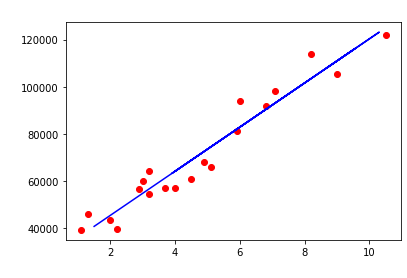

In [41]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, prediction, color='blue') # I think we just could have used the test to draw this line, because it should be the same.
plt.title("Salary vs. Experience (Training set)", color = 'white')
plt.xlabel('Years of experience', color = 'white')
plt.ylabel('Salary', color = 'white')

## Visualising the Test set results

Text(0, 0.5, 'Salary')

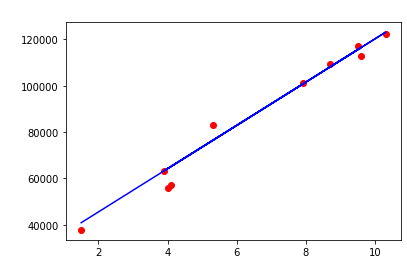

In [43]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, prediction, color = 'blue')
plt.title('Salary vs. Experience (Test set)', color = 'white')
plt.xlabel('Years of experience', color = 'white')
plt.ylabel('Salary', color = 'white')

## Bonus



# Q1

How do I use my simple linear regression model to make a single prediction. Ex, predic the salary of an employee w/ 12 years experience?

Could get the coeffieicents from the regressor and do it manually. Or, just predict a single value.

In [49]:
# Using predictor
y1 = regressor.predict([[12]])
print(y1)

#Using coefficients
y2 = regressor.coef_[0]*12 + regressor.intercept_
print(y2)

[138967.5015615]
138967.50156149964


# Q2

In [54]:
#Already answered in Q1. Use regressor.intercept_ to get b0. regressor_coef contains bi. Here, we only have b0.
class regEq:
  def __init__(self, intercept, slope):
    self._intercept = intercept
    self._slope = slope

  def calculate(self, x):
    return self._slope*x + self._intercept


r = regEq(regressor.intercept_, regressor.coef_[0])
print(r.calculate(12))

138967.50156149964
